# Artificial Neural Network

## Part 1 - Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from pathlib import Path
import pickle

## Part 2 - Data Preprocessing

In [2]:
#Access input folder
current_dir = Path.cwd()
parent_dir = current_dir.parent
input_dir1 = Path ("G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset")
print ("input",input_dir1)

#Access folders inside input folder
input_dir2_train =  [folder_input for folder_input in input_dir1.iterdir() if folder_input.is_dir()]
print ("2",input_dir2_train)

input G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset
2 [WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_1'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_13'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_17'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_21'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_25'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_29'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_33'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_time_history/Near_field_time_history_dataset/L13_37'), WindowsPath('G:/Chamodi/LSDYNA_1D/Incident_pressure_

In [3]:
# Access each folder inside input folder
dataset_train = pd.DataFrame(columns = ['Mass', 'Standoff distance', 'Time', 'Phase', 'Pressure'])
df_list_train = []
for folder_train in input_dir2_train:
    
    # Make a list of data file names
    files_train = list(file_train for file_train in folder_train.rglob("*.xlsx"))
    print ("folder", folder_train)
    
    for file_train in files_train:
        df_list_train.append(pd.read_excel(file_train))
        print (file_train.stem)

dataset_train = pd.concat(df_list_train, ignore_index = True)

folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_1
1
11
13
15
17
3
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_13
1
11
13
15
17
3
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_17
1
11
13
15
17
3
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_21
1
11
13
15
17
3
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_25
1
11
13
15
17
3
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_29
1
11
13
15
17
3
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_33
1
11
13
15
17
3
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pressure_time_history\Near_field_time_history_dataset\L13_37
1
11
13
15
17
3
5
7
9
folder G:\Chamodi\LSDYNA_1D\Incident_pres

In [4]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46341 entries, 0 to 46340
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               46341 non-null  float64
 1   Standoff distance  46341 non-null  float64
 2   Time               46341 non-null  float64
 3   Phase              46341 non-null  object 
 4   Pressure           46341 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.8+ MB


In [5]:
dataset_train = pd.get_dummies(dataset_train, columns =['Phase'], dtype = np.uint8)
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46341 entries, 0 to 46340
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               46341 non-null  float64
 1   Standoff distance  46341 non-null  float64
 2   Time               46341 non-null  float64
 3   Pressure           46341 non-null  float64
 4   Phase_negative     46341 non-null  uint8  
 5   Phase_positive     46341 non-null  uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.5 MB


In [6]:
dataset_train.head(30)

,Mass,Standoff distance,Time,Pressure,Phase_negative,Phase_positive
0,0.5,1.0,0.66956,490.686000,0,1
1,0.5,1.0,0.68975,423.983000,0,1
2,0.5,1.0,0.70990,368.251000,0,1
3,0.5,1.0,0.72965,322.236000,0,1
4,0.5,1.0,0.74993,282.027000,0,1
5,0.5,1.0,0.77966,233.558000,0,1
6,0.5,1.0,0.80997,193.854000,0,1
7,0.5,1.0,0.83980,162.150000,0,1
8,0.5,1.0,0.86998,135.917000,0,1
9,0.5,1.0,0.88981,121.213000,0,1


In [7]:
y = dataset_train['Pressure']
X = dataset_train.drop(['Pressure'], axis=1)
print(X.shape, y.shape)

(46341, 5) (46341,)


In [8]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 0)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,0:3] = sc.fit_transform(X_train[:, 0:3])
print (X_train)

[[ 0.34597556  0.0152104  -1.21167387  1.          0.        ]
 [ 0.7409399  -1.10064709  0.8015215   1.          0.        ]
 [ 0.93842206  1.50302039  0.15938157  1.          0.        ]
 ...
 [ 1.38275694  0.7591154  -0.96374341  1.          0.        ]
 [ 1.38275694 -1.10064709 -1.59349049  0.          1.        ]
 [-1.43136395 -0.3567421  -1.14475745  1.          0.        ]]


In [12]:
X_test[:,0:3] = sc.transform(X_test[:,0:3])
print (X_test)

[[ 1.13590423  0.3871629   1.48333025  1.          0.        ]
 [ 0.34597556 -1.10064709 -0.2162331   1.          0.        ]
 [-1.62884611  1.13106789  0.26723128  1.          0.        ]
 ...
 [-0.04898877 -0.3567421  -0.21871242  1.          0.        ]
 [ 0.54345773  0.0152104   1.13002937  1.          0.        ]
 [ 0.34597556 -1.47259959  1.02341927  1.          0.        ]]


In [13]:
X_val[:,0:3] = sc.transform(X_val[:,0:3])
print (X_val)

[[-1.23388178 -1.10064709 -1.0753121   1.          0.        ]
 [-1.82632828  1.50302039  1.09160015  1.          0.        ]
 [ 0.14849339  0.3871629  -1.19928975  1.          0.        ]
 ...
 [ 0.14849339  0.0152104  -1.1583688   1.          0.        ]
 [-0.83891744  0.0152104   0.12467128  1.          0.        ]
 [ 0.34597556  0.7591154   0.1159937   1.          0.        ]]


In [14]:
print ("X_train", len(X_train))
print ("X_test", len(X_test))
print ("X_val", len(X_val))

X_train 27804
X_test 9269
X_val 9268


## Part 3 - Building the ANN

In [15]:
ann = tf.keras.models.Sequential()

In [16]:
ann.add(tf.keras.layers.Dense(units=250,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=225,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))
ann.add(tf.keras.layers.Dense(units=200,
                              input_shape=(X_train.shape[1],),
                              activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

In [18]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               1500      
                                                                 
 dense_1 (Dense)             (None, 225)               56475     
                                                                 
 dense_2 (Dense)             (None, 200)               45200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 103,376
Trainable params: 103,376
Non-trainable params: 0
_________________________________________________________________


## Part 4 - Training the ANN

In [19]:
# from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

In [20]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [21]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=30,
                    verbose=1)

Epoch 1/500
927/927 [==============================] - 45s 47ms/step - loss: 71585.2812 - mae: 62.4467 - val_loss: 64724.3281 - val_mae: 63.7334
Epoch 2/500
927/927 [==============================] - 4s 4ms/step - loss: 61658.1914 - mae: 59.3307 - val_loss: 59197.2188 - val_mae: 59.9347
Epoch 3/500
927/927 [==============================] - 4s 4ms/step - loss: 59764.7422 - mae: 58.3392 - val_loss: 56371.5039 - val_mae: 55.2428
Epoch 4/500
927/927 [==============================] - 4s 4ms/step - loss: 59469.4375 - mae: 58.6651 - val_loss: 56401.3242 - val_mae: 55.8111
Epoch 5/500
927/927 [==============================] - 4s 4ms/step - loss: 58756.4922 - mae: 57.8979 - val_loss: 62172.9531 - val_mae: 61.5387
Epoch 6/500
927/927 [==============================] - 4s 4ms/step - loss: 58001.8086 - mae: 57.0672 - val_loss: 55101.3789 - val_mae: 56.9615
Epoch 7/500
927/927 [==============================] - 4s 4ms/step - loss: 56987.8477 - mae: 56.7282 - val_loss: 54256.4570 - val_mae: 58.14

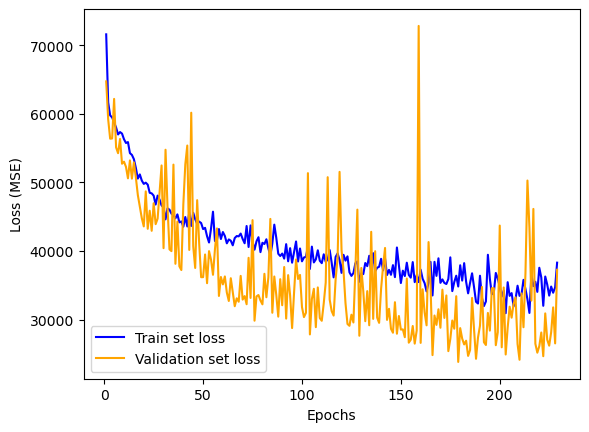

In [22]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.savefig('Section1_ANN1_2.png', dpi=300, bbox_inches='tight')
plt.show()

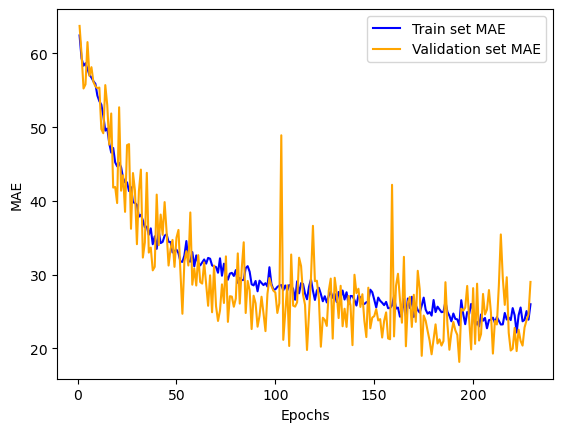

In [23]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.savefig('Section1_ANN1_3.png', dpi=300, bbox_inches='tight')
plt.show()

### Save the model

In [24]:
ann.save('Section1_ANN_1')
import pickle
pickle.dump(sc, open('Section1_scaler_ANN_1.pkl', 'wb'))

INFO:tensorflow:Assets written to: Section1_ANN_1\assets


## Part 5 - Make predictions

290/290 [==============================] - 1s 3ms/step


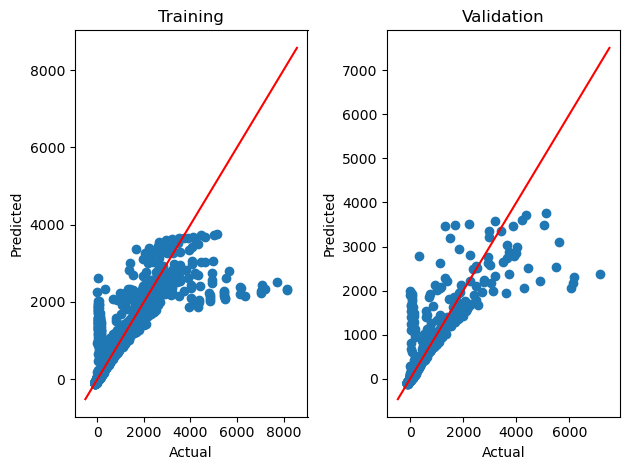

In [25]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

plt.savefig('Section1_ANN1_1.png', dpi=150, bbox_inches='tight')

# show the plot
plt.show()

In [26]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

290/290 [==============================] - 1s 3ms/step
[[ -9.65  -9.19]
 [-40.21 -40.39]
 [ -3.37  -4.06]
 ...
 [-28.3  -28.26]
 [ -8.86  -9.15]
 [-14.99 -15.75]]


Text(0, 0.5, 'Predicted data')

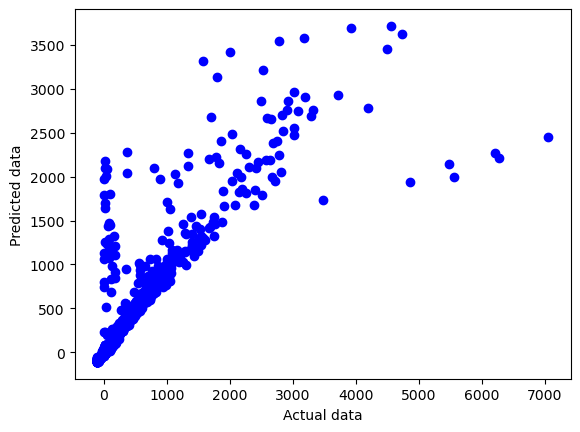

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

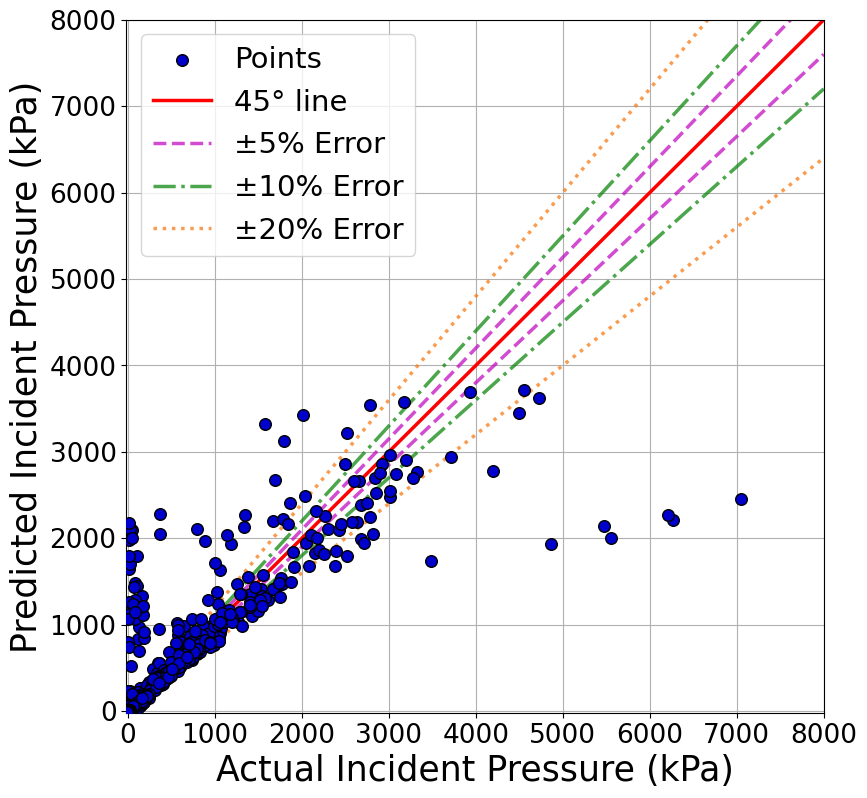

In [28]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))
b_l = -20
u_l = 8000

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted Incident Pressure (kPa)',fontsize = 25)
plt.xlabel('Actual Incident Pressure (kPa)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper left',fontsize = 21)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red
plt.savefig('Section1_ANN1.png', dpi=300, bbox_inches='tight')

In [29]:
# metrics
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

869/869 [==============================] - 3s 3ms/step
18.9920133029304
16.913598626839768


In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.7778484191021191


In [31]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.7745412659763622


In [32]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 5% margin 1.72%
Within 10% margin 3.77%
Within 20% margin 7.35%
Out of 20% margin 92.65%


In [33]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.7777285056934513


In [34]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

142.13292956288905

In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

16.913598626839768